<a href="https://colab.research.google.com/github/meme0134/MathPerception/blob/main/MathPerception_20250414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1ÔºöÂÆâË£ÖÂíåÂØºÂÖ•Â∫ì
!pip install praw
!pip install bertopic
!pip install nltk
!pip install vaderSentiment
!pip install -U sentence-transformers


In [4]:
#2ÔºöÂàóÂá∫Â∑≤ÂÆâË£ÖÂ∫ìÔºàÂèØÈÄâÔºâ
import praw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic
import matplotlib.pyplot as plt

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
# 3ÔºöÊäìÂèñ Reddit Êï∞ÊçÆÔºà‰ªÖËøë5Âπ¥ÂÜÖÔºåÂåÖÂê´ title„ÄÅÊ≠£Êñá„ÄÅËá™Â∏¶ËØÑËÆ∫Ôºâ

import praw
import pandas as pd
import time
from datetime import datetime

# ÂàùÂßãÂåñ Reddit API
reddit = praw.Reddit(
    client_id="D7jV133THru3cEHpEvhCKQ",
    client_secret="C5VA2Vbv51bRainAcoUf7vRMnRlqfA",
    user_agent="math-crawler by zoey"
)

# ËÆæÁΩÆÁõÆÊ†á Subreddit ÂíåÂ∏ñÂ≠êÊï∞Èáè
subreddit_name = "learnmath"
limit = 500
data = []

# ÂΩìÂâçÊó∂Èó¥‰∏é5Âπ¥ÂâçÁöÑÊó∂Èó¥Êà≥
now = time.time()
five_years_ago = now - 5 * 365 * 24 * 60 * 60  # 5Âπ¥ÁßíÊï∞

# ÈÅçÂéÜÂ∏ñÂ≠êÔºàhot ÊéíÂ∫èÔºå‰Ω†‰πüÂèØ‰ª•Êîπ‰∏∫ .newÔºâ
for submission in reddit.subreddit(subreddit_name).hot(limit=limit):

    # ‚úÖ Ë∑≥Ëøá5Âπ¥ÂâçÁöÑÂ∏ñÂ≠ê
    if submission.created_utc < five_years_ago:
        continue

    submission.comments.replace_more(limit=0)
    for comment in submission.comments:
        data.append({
            "post_title": submission.title,
            "post_content": submission.selftext,
            "comment": comment.body,
            "created_utc": submission.created_utc,
            "created_date": datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d')
        })

# ÂàõÂª∫ DataFrame
# df = pd.DataFrame(data)
df_reddit = pd.DataFrame(data)

# ‰øùÂ≠ò‰∏∫ CSV Êñá‰ª∂ÔºàÂèØÈÄâÔºâ
df.to_csv("reddit_comments_recent5years.csv", index=False)

# Êü•ÁúãÂâçÂá†Ë°å
df.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

post_title  \
0  [Megathread] Post your favorite (or your own) ...   
1  [Megathread] Post your favorite (or your own) ...   
2  [Megathread] Post your favorite (or your own) ...   
3  [Megathread] Post your favorite (or your own) ...   
4  [Megathread] Post your favorite (or your own) ...   

                                        post_content  \
0  Due to a bunch of people posting their channel...   
1  Due to a bunch of people posting their channel...   
2  Due to a bunch of people posting their channel...   
3  Due to a bunch of people posting their channel...   
4  Due to a bunch of people posting their channel...   

                                             comment   created_utc  \
0  [3Blue1Brown - YouTube](https://www.youtube.co...  1.610528e+09   
1  I just google the best books on a topic and do...  1.610528e+09   
2  Since moving online, I have made videos for my...  1.610528e+09   
3  The Math Sorcerer on youtube is a great motivator  1.610528e+09   
4  Shameless plug of my drag-and-drop math app [M...  1.610528e+09   

  created_date  
0   2021-01-13  
1   2021-01-13  
2   2021-01-13  
3   2021-01-13  
4   2021-01-13

In [125]:
# ‰ªétwitterÊäìÂèñ---Êäì‰∏çÂà∞Ôºå‰πüÊ≤°Êäìcomments

# ‚úÖ ÂÆâË£Ö snscrape CLI Â∑•ÂÖ∑
!pip install -q snscrape

# ‚úÖ Áî® shell ÂëΩ‰ª§Ë∞ÉÁî® snscrapeÔºå‰øùÂ≠ò‰∏∫ jsonl Êñá‰ª∂
!snscrape --jsonl --max-results 1000 --since 2023-01-01 twitter-search "math OR mathematics lang:en until:2023-12-31" > twitter_raw.json

# ‚úÖ ËØªÂèñ jsonl Êñá‰ª∂Âà∞ DataFrame
import pandas as pd
import json

tweets = []
with open("twitter_raw.json", "r") as f:
    for line in f:
        tweet = json.loads(line)
        tweets.append({
            "post_title": "",  # Twitter Ê≤°Êúâ title
            "post_content": tweet["content"],
            "comment": "",     # ÊöÇ‰∏çÊäìÂõûÂ§ç
            "created_date": tweet["date"][:10]  # ÂèñÂâç10‰ΩçÂèòÊàê YYYY-MM-DD
        })

df_twitter = pd.DataFrame(tweets)
df_twitter.to_csv("twitter_math.csv", index=False)
df_twitter.head()

2025-04-15 20:39:37.198  ERROR  snscrape.base  Error retrieving https://twitter.com/search?f=live&lang=en&q=math+OR+mathematics+lang%3Aen+until%3A2023-12-31&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=math+OR+mathematics+lang%3Aen+until%3A2023-12-31&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1016)')))"))
2025-04-15 20:39:37.198  CRITICAL  snscrape.base  4 requests to https://twitter.com/search?f=live&lang=en&q=math+OR+mathematics+lang%3Aen+until%3A2023-12-31&src=spelling_expansion_revert_click failed, giving up.
2025-04-15 20:39:37.198  CRITICAL  snscrape.base  Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=math+OR+mathematics+

Empty DataFrame
Columns: []
Index: []

In [127]:
df_twitter.head(10)

Empty DataFrame
Columns: [source, post_title, post_content, comment, created_date]
Index: []

In [126]:
#‰∏∫dfÊ∑ªÂä†sourceÊù•Ê∫ê

# ‚úÖ ‰∏∫ Reddit Êï∞ÊçÆÂä†Êù•Ê∫êÊ†áÁ≠æ
df_reddit["source"] = "Reddit"

# ‚úÖ ‰∏∫ Twitter Êï∞ÊçÆÂä†Êù•Ê∫êÊ†áÁ≠æ
df_twitter["source"] = "Twitter"

# ‚úÖ ÔºàÊú™Êù•Ôºâ‰∏∫ YouTube Êï∞ÊçÆÈ¢ÑÁïôÁªìÊûÑ
# df_youtube["source"] = "YouTube"

# ‚úÖ Áªü‰∏ÄÂàóÊ†ºÂºèÔºàÂ¶ÇÈúÄÂèØÂä†ÂÖ• post_idÔºâ
standard_cols = ["post_title", "post_content", "comment", "created_date", "source"]

# ‚úÖ Á°Æ‰øùÊâÄÊúâÂπ≥Âè∞Êï∞ÊçÆÈÉΩÊúâËøô‰∫õÂàóÔºàÂç≥‰ΩøÊòØÁ©∫ÁöÑÔºâ
for df_partial in [df_reddit, df_twitter]:  # , df_youtube
    for col in standard_cols:
        if col not in df_partial.columns:
            df_partial[col] = ""

# ‚úÖ ÂêàÂπ∂ÊâÄÊúâÊù•Ê∫êÁöÑÊï∞ÊçÆÔºåÂπ∂Áõ¥Êé•ÂëΩÂêç‰∏∫ dfÔºåÂêéÁª≠Êó†ÈúÄÊîπÂêç
df = pd.concat([df_reddit, df_twitter], ignore_index=True)  # , df_youtube

In [111]:
# Á¨¨5Ê≠•ÔºöÊñáÊú¨È¢ÑÂ§ÑÁêÜÔºàÁªü‰∏ÄÂëΩÂêç‰∏∫ post_title + post_contentÔºâ

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# ‰∏ãËΩΩÂøÖË¶ÅËµÑÊ∫ê
nltk.download("punkt")
nltk.download("stopwords")

# ÂàùÂßãÂåñÂ∑•ÂÖ∑
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess(text):
    words = word_tokenize(str(text).lower())
    words = [stemmer.stem(w) for w in words if w.isalpha() and w not in stop_words]
    return " ".join(words)

# ‚úÖ Ê∏ÖÊ¥óÂ≠óÊÆµ
df["cleaned_title"] = df["post_title"].astype(str).apply(preprocess)
df["cleaned_content"] = df["post_content"].astype(str).apply(preprocess)
df["cleaned_comment"] = df["comment"].astype(str).apply(preprocess)

# ‚úÖ ÂêàÂπ∂ÂéüÂßã‰∏éÊ∏ÖÊ¥óÂêéÁöÑÂ≠óÊÆµ
df["title_and_content"] = df["post_title"].fillna('') + " " + df["post_content"].fillna('')
df["cleaned_title_and_content"] = df["cleaned_title"] + " " + df["cleaned_content"]

# ‰øùÂ≠òÊ∏ÖÊ¥óÁªìÊûú
df.to_csv("reddit_cleaned.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
title_texts = df["cleaned_title"].tolist()
topic_model_title = BERTopic()
title_topics, _ = topic_model_title.fit_transform(title_texts)
df["title_topic"] = title_topics   # ‚úÖ Âä†‰∏äËøô‰∏ÄË°åÔºåËß£ÂÜ≥ÈóÆÈ¢òÔºÅ
df.to_csv("reddit_with_title_topics.csv", index=False)


In [113]:
#Á≠õÈÄâ‰∏éÊï∞Â≠¶Ë°®ÂæÅÁõ∏ÂÖ≥ÁöÑÂ∏ñÂ≠êtitleÂíåcontent
from sentence_transformers import SentenceTransformer, util
import torch

# ÂàùÂßãÂåñ SBERT Ê®°Âûã
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# ÂÆö‰πâÁî®‰∫éÁ≠õÈÄâÁöÑËØ≠‰πâÊü•ËØ¢ËØ≠Âè•ÔºàÂª∫ËÆÆÁî®Á§æ‰ºö+‰∏™‰∫∫ËßÜËßíÊ∑∑ÂêàÔºâ
queries = [
    "how mathematics is represented in media",
    "attitude towards mathematics in society",
    "stereotypes about math and mathematicians",
    "math is hard or boring",
    "social perception of mathematics"
]

# Step 1Ô∏è‚É£Ôºö‰ªé df ‰∏≠ÊèêÂèñÂîØ‰∏ÄÁöÑÂ∏ñÂ≠êÔºàÊØè‰∏™ title + content ‰øùÁïô‰∏ÄÊ¨°Ôºâ
df_posts = df[['post_title', 'post_content']].drop_duplicates().reset_index(drop=True)
df_posts['title_and_content'] = df_posts['post_title'].fillna('') + " " + df_posts['post_content'].fillna('')

# Step 2Ô∏è‚É£ÔºöÁºñÁ†ÅÊü•ËØ¢ËØ≠Âè•ÂêëÈáè
query_embeddings = sbert_model.encode(queries, convert_to_tensor=True)

# Step 3Ô∏è‚É£ÔºöÁºñÁ†ÅÊØè‰∏™Â∏ñÂ≠êÊñáÊú¨
post_embeddings = sbert_model.encode(
    df_posts['title_and_content'].tolist(),
    convert_to_tensor=True,
    show_progress_bar=True
)

# Step 4Ô∏è‚É£ÔºöËÆ°ÁÆóÊØè‰∏™Â∏ñÂ≠ê‰∏é query ÁöÑÊúÄÂ§ßÁõ∏‰ººÂ∫¶
cos_scores = util.cos_sim(post_embeddings, query_embeddings)
max_scores, _ = torch.max(cos_scores, dim=1)

# Step 5Ô∏è‚É£ÔºöËÆæÁΩÆÈòàÂÄºËøõË°åÁ≠õÈÄâÔºàÊØîÂ¶Ç 0.3Ôºâ
threshold = 0.3
df_posts['sbert_similarity'] = max_scores.cpu().numpy()
df_posts_filtered = df_posts[df_posts['sbert_similarity'] >= threshold].reset_index(drop=True)

# ÈáçÊñ∞‰ªé df ‰∏≠ÊääÊ∏ÖÊ¥óÂêéÁöÑÂàóË°•Âõû df_posts_filtered
df_cleaned = df[['post_title', 'cleaned_title', 'cleaned_content']].drop_duplicates()
df_posts_filtered = df_posts_filtered.merge(df_cleaned, on='post_title', how='left')

# ÈáçÊñ∞ÁîüÊàê cleaned_title_and_content
df_posts_filtered['cleaned_title_and_content'] = df_posts_filtered['cleaned_title'] + ' ' + df_posts_filtered['cleaned_content']

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# ÂàùÂßãÂåñ BERTopic Ê®°ÂûãÔºà‰Ω†ÂèØ‰ª•Ëá™ÂÆö‰πâÂèÇÊï∞Ôºâ
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    language="english",
    min_topic_size=5,  # ÈªòËÆ§ÊòØ10ÔºåÂí±ÊîπÂ∞è
    calculate_probabilities=True
)
# ÂØπÊ∏ÖÊ¥óÂêéÁöÑÂ∏ñÂ≠êÊñáÊú¨ËøõË°åÂª∫Ê®°
texts = df_posts_filtered["cleaned_title_and_content"].tolist()
topics, probs = topic_model.fit_transform(texts)

# Â∞ÜÁªìÊûúÂä†ÂÖ•Âéü dataframe
df_posts_filtered["representation_topic"] = topics

print(f"ÂéüÂßãÂ∏ñÂ≠êÊï∞: {len(df_posts)}ÔºåÁ≠õÈÄâÂêé‰øùÁïô: {len(df_posts_filtered)}")


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

ÂéüÂßãÂ∏ñÂ≠êÊï∞: 458ÔºåÁ≠õÈÄâÂêé‰øùÁïô: 49


In [114]:
# ÂÖ≥ËÅî‰∏ªÈ¢ò‰∏éËØÑËÆ∫

# ‚úÖ Step 8: ÂõûÊ∫ØËØÑËÆ∫Êï∞ÊçÆÔºàÂåπÈÖç‰øùÁïô‰∏ãÊù•ÁöÑÂ∏ñÂ≠êÊ†áÈ¢òÔºâ
filtered_titles = df_posts_filtered['post_title'].unique()
df_filtered = df[df['post_title'].isin(filtered_titles)].reset_index(drop=True)

# ‚úÖ ‚úÖ ÂÖàËøáÊª§ÊéâÊó†ÊïàËØÑËÆ∫
df_filtered = df_filtered.dropna(subset=["cleaned_comment"])

# ‚úÖ Step 9: ÊÉÖÁª™ÂàÜÊûêÔºà‰ΩøÁî® NLTK VADERÔºâ
analyzer = SentimentIntensityAnalyzer()
df_filtered["sentiment_score"] = df_filtered["cleaned_comment"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)

# ‚úÖ ÂéªÊéâÊ≤°ÊúâËØÑËÆ∫ÊàñÊ≤°ÊúâÊÉÖÁª™ÂàÜÁöÑË°åÔºàÈò≤Ê≠¢ÁîªÂõæÂá∫ÈîôÔºâ
df_filtered = df_filtered.dropna(subset=["cleaned_comment", "sentiment_score"])

# ‚úÖ STEP 10: ‰ªé‰∏ªÈ¢òÂª∫Ê®°ÁªìÊûú‰∏≠ÊèêÂèñ representation_topic
titles_df = df_posts_filtered[["post_title", "representation_topic"]].drop_duplicates()

# ‚úÖ STEP 11: ÂêàÂπ∂ËØÑËÆ∫Êï∞ÊçÆÂíåÂ∏ñÂ≠ê‰∏ªÈ¢òÁºñÂè∑ÔºàÂøÖÈ°ªÁî®ÊâìÂ•ΩÊÉÖÁª™ÂàÜÁöÑ df_filteredÔºâ
merged_df = df_filtered.merge(titles_df, on="post_title", how="left")

# ‚úÖ STEP 12: Âè™‰øùÁïôËÅöÁ±ªÊàêÂäüÁöÑÔºàÈùû -1ÔºâÊï∞ÊçÆ
final_df = merged_df[merged_df["representation_topic"] != -1].copy()


# ‚úÖ Step 5ÔºöÊ∏ÖÁêÜÂíåË∞ÉÊï¥ final_df ÁöÑÂàóÁªìÊûÑ

# Âà†Èô§ÈáçÂ§çÂàó title_topicÔºàÂ¶ÇÊûúËøòÊúâÔºâ
final_df = final_df.drop(columns=["title_topic"], errors="ignore")

# ÈáçÂëΩÂêç cleaned_title_and_content ‚Üí clean_representation
final_df = final_df.rename(columns={"cleaned_title_and_content": "cleaned_representation"})

# ÊääËøôÂá†‰∏™ÂàóÊîæÂà∞ÊúÄÂêéÔºåËÆ∫ÊñáÁªìÊûÑÊõ¥Ê∏ÖÊô∞
cols_to_move = [
    "cleaned_representation",
    "representation_topic",
    "cleaned_comment",
    "sentiment_score"
]
other_cols = [col for col in final_df.columns if col not in cols_to_move]
final_df = final_df[other_cols + cols_to_move]

# ‚úÖ Êü•ÁúãÊõ¥Êñ∞ÂêéÁöÑÁªìÊûú
final_df.head()

# ‚úÖ DONEÔºöÊü•ÁúãÊúÄÁªàÁªìÊûú
final_df.head()



post_title  \
11  Math induced panic attacks   
12  Math induced panic attacks   
13  Math induced panic attacks   
14  Math induced panic attacks   
15  Math induced panic attacks   

                                         post_content  \
11  sorry if this isn‚Äôt the sub for this but has a...   
12  sorry if this isn‚Äôt the sub for this but has a...   
13  sorry if this isn‚Äôt the sub for this but has a...   
14  sorry if this isn‚Äôt the sub for this but has a...   
15  sorry if this isn‚Äôt the sub for this but has a...   

                                              comment   created_utc  \
11  It seems that you are approaching math with an...  1.744727e+09   
12  I specialize in working with students like thi...  1.744727e+09   
13  do you know what specifically causes them? if ...  1.744727e+09   
14  IDK which country you live in but in most coun...  1.744727e+09   
15  You can talk, meaning you can take the thought...  1.744727e+09   

   created_date            cleaned_title  \
11   2025-04-15  math induc panic attack   
12   2025-04-15  math induc panic attack   
13   2025-04-15  math induc panic attack   
14   2025-04-15  math induc panic attack   
15   2025-04-15  math induc panic attack   

                                      cleaned_content  \
11  sorri sub anyon els dealt overcom fear math re...   
12  sorri sub anyon els dealt overcom fear math re...   
13  sorri sub anyon els dealt overcom fear math re...   
14  sorri sub anyon els dealt overcom fear math re...   
15  sorri sub anyon els dealt overcom fear math re...   

                                    title_and_content  \
11  Math induced panic attacks sorry if this isn‚Äôt...   
12  Math induced panic attacks sorry if this isn‚Äôt...   
13  Math induced panic attacks sorry if this isn‚Äôt...   
14  Math induced panic attacks sorry if this isn‚Äôt...   
15  Math induced panic attacks sorry if this isn‚Äôt...   

                               cleaned_representation  representation_topic  \
11  math induc panic attack sorri sub anyon els de...                     1   
12  math induc panic attack sorri sub anyon els de...                     1   
13  math induc panic attack sorri sub anyon els de...                     1   
14  math induc panic attack sorri sub anyon els de...                     1   
15  math induc panic attack sorri sub anyon els de...                     1   

                                      cleaned_comment  sentiment_score  
11  seem approach math mindset think cognit refram...           0.0000  
12  special work student like could write book sho...           0.7003  
13  know specif caus figur itll put much better po...           0.4404  
14  idk countri live countri math idiot matter are...          -0.5267  
15  talk mean take thought feel brain encod word p...           0.4939

In [115]:
print("ÊúÄÁªàÊúâÊïàË°åÊï∞Ôºö", final_df.shape[0])
print("ÈùûÁ©∫ÊÉÖÁª™ÂÄºÊï∞ÈáèÔºö", final_df["sentiment_score"].notna().sum())

ÊúÄÁªàÊúâÊïàË°åÊï∞Ôºö 264
ÈùûÁ©∫ÊÉÖÁª™ÂÄºÊï∞ÈáèÔºö 264


In [116]:
print("df_posts_filteredÔºàË¢´ SBERT ‰øùÁïôÁöÑÂ∏ñÂ≠êÊï∞ÔºâÔºö", len(df_posts_filtered))

df_posts_filteredÔºàË¢´ SBERT ‰øùÁïôÁöÑÂ∏ñÂ≠êÊï∞ÔºâÔºö 49


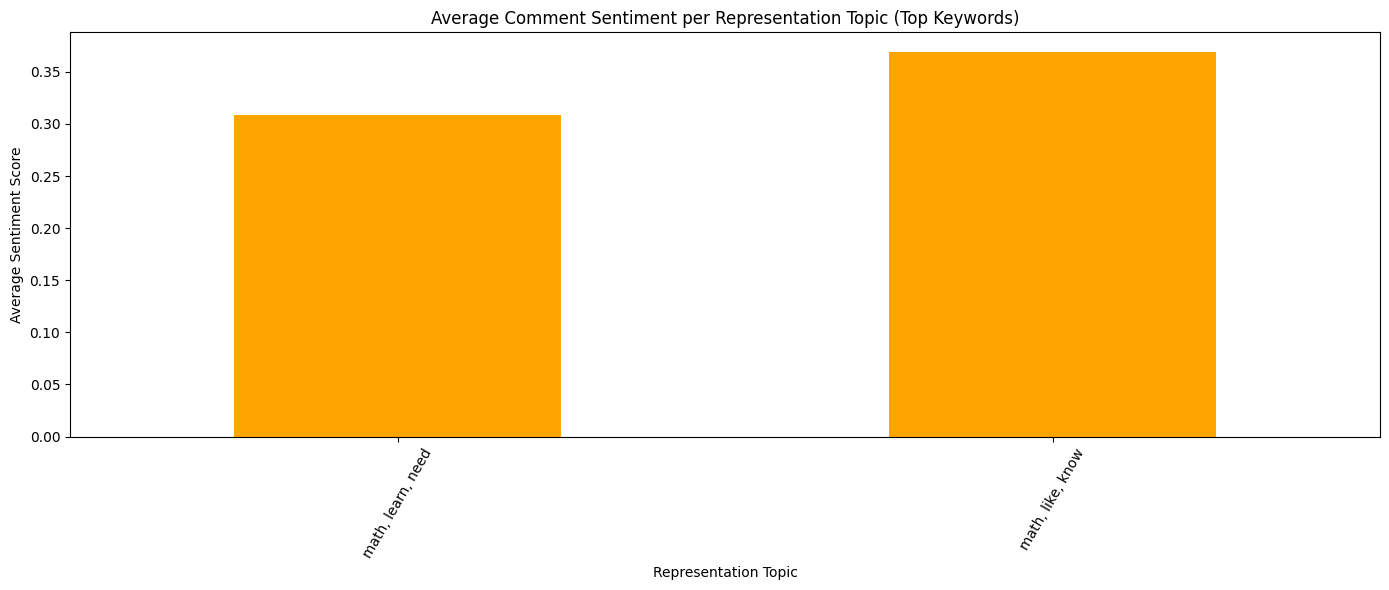

In [117]:
# ‚úÖ Step 1: representation_topic ÂàÜÁªÑÔºåËÆ°ÁÆóËØÑËÆ∫ÁöÑÂπ≥ÂùáÊÉÖÁª™
avg_sentiment_by_topic = final_df.groupby("representation_topic")["sentiment_score"].mean()
sorted_sentiment = avg_sentiment_by_topic.sort_values()

# ‚úÖ Step 2: Ëé∑ÂèñÊØè‰∏™ topic ÁöÑÂÖ≥ÈîÆËØçÔºàÁî®‰∫éÊ®™ËΩ¥Â±ïÁ§∫Ôºâ
topic_labels = {}
for topic_num in sorted_sentiment.index:
    words = topic_model.get_topic(topic_num)  # ‰ΩøÁî®‰Ω†Â∑≤ÂÆö‰πâÁöÑ BERTopic Ê®°Âûã
    if words:
        label = ", ".join([w[0] for w in words[:3]])  # ÂèñÂâç3‰∏™ÂÖ≥ÈîÆËØç
    else:
        label = f"Topic {topic_num}"
    topic_labels[topic_num] = label

# ‚úÖ ÊõøÊç¢ index ‰∏∫ÂÖ≥ÈîÆËØç
sorted_sentiment.index = [topic_labels[i] for i in sorted_sentiment.index]

# ‚úÖ Step 3: ÂèØËßÜÂåñ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sorted_sentiment.plot(kind="bar", color="orange")
plt.title("Average Comment Sentiment per Representation Topic (Top Keywords)")
plt.xlabel("Representation Topic")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [118]:
print("üîç ÂÆûÈôÖÁîüÊàêÁöÑ representation ‰∏ªÈ¢òÊï∞Ôºö", df["title_topic"].nunique())
print("ÂêÑ‰∏ªÈ¢òÊï∞ÈáèÂàÜÂ∏ÉÔºö\n", df["title_topic"].value_counts())

print("ÊúÄÁªàÂõæ‰∏≠ÂÆûÈôÖÂá∫Áé∞ÁöÑ topicÔºö")
print(final_df["representation_topic"].value_counts())

üîç ÂÆûÈôÖÁîüÊàêÁöÑ representation ‰∏ªÈ¢òÊï∞Ôºö 100
ÂêÑ‰∏ªÈ¢òÊï∞ÈáèÂàÜÂ∏ÉÔºö
 title_topic
 0     218
-1     130
 1     111
 2      58
 3      54
      ... 
 94     11
 95     11
 96     10
 97     10
 98     10
Name: count, Length: 100, dtype: int64
ÊúÄÁªàÂõæ‰∏≠ÂÆûÈôÖÂá∫Áé∞ÁöÑ topicÔºö
representation_topic
1    153
0    111
Name: count, dtype: int64
